## 16/12/2025

## **heart_disease_uci dataset**

## Data Analysis Part

In [ ]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

- **Step 1** - Loading the Dataset

In [ ]:
df = pd.read_csv(r'/content/heart_disease_uci.csv')
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


1. **id**
A unique number assigned to each patient record to identify them.

2. **age**
The age of the patient in years.

3. **sex**
The gender of the patient (Male or Female).

4. **dataset**
The location or hospital where this specific patient's data was collected (e.g., Cleveland, VA Long Beach).

5. **cp (Chest Pain Type)**
Describes the kind of chest pain the patient experienced. It has four categories ranging from typical heart pain to no symptoms at all.
 - **Typical angina** - most heart related chestpain, caused during physical exertion or stress
 - **Atypical angina** - does not follow the features of typical angina, may occur at rest or mild activity, still related to heart prblms, but symptoms are less clear
 - **Non anginal pain** - cp not related to the heart, caused by muscle strain, digestion issues, or lungs
 - **Asymptomatic** - no cp symptoms, person does not feel discomfort, heart disease may still be present and detected through tests

6. **trestbps (Resting Blood Pressure)**
The patient's blood pressure level measured when they were resting/sitting calmly, recorded in mm Hg.

7. **chol (Cholesterol)**
The amount of cholesterol found in the patient's blood, measured in mg/dl. Higher values can indicate heart risk.

8. **fbs (Fasting Blood Sugar)**
Indicates if the patient's blood sugar was high (greater than 120 mg/dl) after fasting. It helps identify diabetes.

9. **restecg (Resting ECG)**
The results of an electrocardiogram (heart electrical test) taken while the patient was at rest, showing if the heart beat is normal or has abnormalities.

10. **thalch (Max Heart Rate)**
The highest heart rate the patient achieved during an exercise stress test.

11. **exang (Exercise Induced Angina)**
Tells whether the patient felt chest pain (angina) specifically caused by exercise (True or False).

12. **oldpeak**
A numeric value from the ECG showing how much the heart signals dropped during exercise compared to rest. This indicates heart stress.

13. **slope**
Describes the visual "slope" of the heart signal segment during the peak of exercise (Up, Flat, or Down). It relates to how tired the heart is.

14. **ca (Number of Major Vessels)**
The count (0 to 3) of major blood vessels seen clearly during a specific scan. Blocked vessels might not show up, so this helps identify blockages.

15. **thal (Thalassemia)**
Refers to a blood disorder status. It indicates if the blood flow is normal, has a fixed defect (permanent), or a reversible defect (temporary).

16. **num (Diagnosis)**
The final result or target variable. **0** means no heart disease, while **1, 2, 3, or 4** indicate the presence and severity of heart disease.

In [ ]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


### **Data Cleaning**

- **Step 2** - Renaming the Column Names.

In [ ]:
df = df.rename(columns = {'dataset': 'location',
                          'num': 'StagesofHDrisk',
                          'thalch': 'maxHeartRate',
                          'ca': 'coronary arteries'})
df.head()

,id,age,sex,location,cp,trestbps,chol,fbs,restecg,maxHeartRate,exang,oldpeak,slope,coronary arteries,thal,StagesofHDrisk
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


- **Step 3** - Handle Missing Values (Imputation)

In [ ]:
df.head()

,id,age,sex,location,cp,trestbps,chol,fbs,restecg,maxHeartRate,exang,oldpeak,slope,coronary arteries,thal,StagesofHDrisk
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


9. **restecg (Resting ECG)**
The results of an electrocardiogram (heart electrical test) taken while the patient was at rest, showing if the heart beat is normal or has abnormalities.
- **restecg** -> Categorical Column

In [ ]:
df['restecg'].unique()

array(['lv hypertrophy', 'normal', 'st-t abnormality', nan], dtype=object)

In [ ]:
df.loc[df['restecg'].isna(), 'restecg'] = np.where(
    (df.loc[df['restecg'].isna(), 'oldpeak'] > 1.5) |
    (df.loc[df['restecg'].isna(), 'exang'] == 1) |
    (df.loc[df['restecg'].isna(), 'slope'] == 'downsloping') |
    (df.loc[df['restecg'].isna(), 'slope'] == 2),
    'st-t abnormality',
    'normal'
)

In [ ]:
df.restecg.unique()

array(['lv hypertrophy', 'normal', 'st-t abnormality'], dtype=object)

12. **oldpeak**
A numeric value from the ECG showing how much the heart signals dropped during exercise compared to rest. This indicates heart stress.
- **oldpeak** -> Numeric Column

In [ ]:
df['oldpeak'].mode()

,oldpeak
0,0.0


In [ ]:
df[df['oldpeak'].isna()]

,id,age,sex,location,cp,trestbps,chol,fbs,restecg,maxHeartRate,exang,oldpeak,slope,coronary arteries,thal,StagesofHDrisk
599,600,35,Male,Switzerland,asymptomatic,NaN,0.0,NaN,normal,130.0,True,NaN,NaN,NaN,reversable defect,3
606,607,38,Male,Switzerland,asymptomatic,150.0,0.0,NaN,normal,120.0,True,NaN,NaN,NaN,normal,1
636,637,52,Male,Switzerland,asymptomatic,95.0,0.0,NaN,normal,82.0,True,NaN,NaN,NaN,NaN,2
705,706,65,Male,Switzerland,asymptomatic,145.0,0.0,NaN,st-t abnormality,67.0,False,NaN,NaN,NaN,fixed defect,3
707,708,65,Male,Switzerland,asymptomatic,160.0,0.0,True,st-t abnormality,122.0,False,NaN,NaN,NaN,reversable defect,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,895,63,Male,VA Long Beach,atypical angina,NaN,165.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
901,902,55,Male,VA Long Beach,non-anginal,NaN,NaN,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
905,906,61,Male,VA Long Beach,non-anginal,NaN,284.0,False,normal,NaN,NaN,NaN,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
df[df['oldpeak'].isna() & (df['restecg'] == 'normal')].shape[0]

22

In [ ]:
df[df['oldpeak'].isna() & (df['restecg']=='st-t abnormality')].shape[0]

33

In [ ]:
df.loc[df['oldpeak'].isna() & (df['restecg'] == 'normal'), 'oldpeak'] = 0.0
df.loc[df['oldpeak'].isna() & (df['restecg'] != 'normal'), 'oldpeak'] = 1.5

In [ ]:
df['oldpeak'].isna().sum()

np.int64(0)

7. **chol (Cholesterol)**
The amount of cholesterol found in the patient's blood, measured in mg/dl. Higher values can indicate heart risk.
- **chol** -> Numeric Column

In [ ]:
df['chol'].median()

223.0

In [ ]:
df['chol'] = df['chol'].fillna(df['chol'].median())

8. **fbs (Fasting Blood Sugar)**
Indicates if the patient's blood sugar was high (greater than 120 mg/dl) after fasting. It helps identify diabetes.
- **fbs** -> Categorical Column

In [ ]:
df['fbs'].mode()

,fbs
0,False


In [ ]:
df['fbs'] = df['fbs'].fillna(df['fbs'].mode()[0])

/tmp/ipython-input-2214830989.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['fbs'] = df['fbs'].fillna(df['fbs'].mode()[0])


In [ ]:
df['fbs'].isna().sum()

np.int64(0)

6. **trestbps (Resting Blood Pressure)**
The patient's blood pressure level measured when they were resting/sitting calmly, recorded in mm Hg.
- **trestbps** -> Numerical Column

In [ ]:
df['trestbps'].median()

130.0

In [ ]:
df['trestbps'] = df['trestbps'].fillna(df['trestbps'].median())

In [ ]:
df['trestbps'].isna().sum()

np.int64(0)

10. **thalch (Max Heart Rate)**
The highest heart rate the patient achieved during an exercise stress test.
- **maxHeartRate** -> Numerical Column

In [ ]:
df['maxHeartRate'].mode()

,maxHeartRate
0,150.0


In [ ]:
df['maxHeartRate'].median()

140.0

In [ ]:
df['maxHeartRate'] = df['maxHeartRate'].fillna(df['maxHeartRate'].mode()[0])

In [ ]:
df['maxHeartRate'].isna().sum()

np.int64(0)

11. **exang (Exercise Induced Angina)**
Tells whether the patient felt chest pain (angina) specifically caused by exercise (True or False).
- **exang** -> Categorical Column

In [ ]:
df['exang'].mode()

,exang
0,False


In [ ]:
df['exang'] = df['exang'].fillna(df['exang'].mode()[0])

/tmp/ipython-input-3192975667.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['exang'] = df['exang'].fillna(df['exang'].mode()[0])


14. **ca (Number of Major Vessels)**
The count (0 to 3) of major blood vessels seen clearly during a specific scan. Blocked vessels might not show up, so this helps identify blockages.
- **coronary arteries** -> Categorical Column

In [ ]:
df['coronary arteries'].unique()

array([ 0.,  3.,  2.,  1., nan])

In [ ]:
df[df['coronary arteries'].isna() & (df['age'] > 50)].shape[0]

388

In [ ]:
df.loc[df['coronary arteries'].isna(), 'age'].mode()

,age
0,54


In [ ]:
df.loc[df['age'] == 54, 'coronary arteries'].unique()

array([ 0.,  1.,  2., nan])

In [ ]:
df.loc[df['age'] == 54, 'coronary arteries'].value_counts(dropna=False)

,count
coronary arteries,
NaN,35
1.0,8
0.0,7
2.0,1


In [ ]:
df['coronary arteries'] = df['coronary arteries'].fillna(1.0)

15. **thal (Thalassemia)**
Refers to a blood disorder status. It indicates if the blood flow is normal, has a fixed defect (permanent), or a reversible defect (temporary).
- **thal** -> Categorical Column

In [ ]:
df['thal'].mode()

,thal
0,normal


In [ ]:
df['thal'] = df['thal'].fillna(df['thal'].mode()[0])

13. **slope**
Describes the visual "slope" of the heart signal segment during the peak of exercise (Up, Flat, or Down). It relates to how tired the heart is.
- **slope** -> Categorical Column

In [ ]:
df['slope'].mode()

,slope
0,flat


In [ ]:
df['slope'] = df['slope'].fillna(df['slope'].mode()[0])

16. **num (Diagnosis)**
The final result or target variable. **0** means no heart disease, while **1, 2, 3, or 4** indicate the presence and severity of heart disease.

In [ ]:
df['StagesofHDrisk'].unique()

array([0, 2, 1, 3, 4])

In [ ]:
df.isna().sum()

,0
age,0
sex,0
location,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
maxHeartRate,0
exang,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                920 non-null    int64  
 1   sex                920 non-null    object 
 2   location           920 non-null    object 
 3   cp                 920 non-null    object 
 4   trestbps           920 non-null    float64
 5   chol               920 non-null    float64
 6   fbs                920 non-null    bool   
 7   restecg            920 non-null    object 
 8   maxHeartRate       920 non-null    float64
 9   exang              920 non-null    bool   
 10  oldpeak            920 non-null    float64
 11  slope              920 non-null    object 
 12  coronary arteries  920 non-null    float64
 13  thal               920 non-null    object 
 14  StagesofHDrisk     920 non-null    int64  
dtypes: bool(2), float64(5), int64(2), object(6)
memory usage: 95.4+ KB


In [ ]:
df.describe()

,age,trestbps,chol,maxHeartRate,oldpeak,coronary arteries,StagesofHDrisk
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,53.510870,131.995652,199.908696,138.290217,0.884783,0.891304,0.995652
std,9.424685,18.451300,109.040171,25.311498,1.070368,0.562841,1.142693
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,177.750000,120.000000,0.000000,1.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,1.000000,1.000000
75%,60.000000,140.000000,267.000000,156.000000,1.500000,1.000000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [ ]:
df.to_csv("output_HD.csv", index=False)

## **SQL lite**
- Queries

In [ ]:
import sqlite3

In [ ]:
conn = sqlite3.connect("/content/heart_disease_uci.db")
df.to_sql(
    name="heart_disease",
    con=conn,
    if_exists="replace",
    index=False
)

920

### **Questions:**
1. How many total patients are in the dataset?


In [ ]:
# Total no.of patients
query = '''SELECT COUNT(*) AS total_patients
FROM heart_disease;'''
pd.read_sql(query, conn)

,total_patients
0,920


2. How many patients have heart disease `(StagesofHDrisk = 1 to 4)`?

In [ ]:
# Number of patients with heart disease
query = """
SELECT StagesofHDrisk, COUNT(*) AS patient_count
FROM heart_disease
WHERE StagesofHDrisk IN (0, 1, 2, 3, 4)
GROUP BY StagesofHDrisk
ORDER BY StagesofHDrisk;
"""
pd.read_sql(query, conn)


,StagesofHDrisk,patient_count
0,0,411
1,1,265
2,2,109
3,3,107
4,4,28


3. What is the average age of patients?

In [ ]:
# Average age of patients
query = '''
SELECT ROUND(AVG(age), 2) AS avg_age
FROM heart_disease;
'''
pd.read_sql(query, conn)

,avg_age
0,53.51


4. What is the average cholesterol level for patients with heart disease vs without?

In [ ]:
# Average cholesterol (heart disease vs no disease)
query = '''
SELECT StagesofHDrisk, ROUND(AVG(chol), 2) AS avg_chol
FROM heart_disease
GROUP BY StagesofHDrisk;
'''
pd.read_sql(query, conn)

,StagesofHDrisk,avg_chol
0,0,217.37
1,1,190.10
2,2,141.22
3,3,158.22
4,4,185.29


5. Which age group has the highest number of heart disease cases?

In [ ]:
# Heart disease cases by age group
query = '''
SELECT
       CASE
            WHEN age BETWEEN 30 AND 39 THEN '30-39'
            WHEN age BETWEEN 40 AND 49 THEN '40-49'
            WHEN age BETWEEN 50 AND 59 THEN '50-59'
            WHEN age BETWEEN 60 AND 69 THEN '60-69'
            ELSE '70+'
       END AS age_group,
       COUNT(*) AS cases
FROM heart_disease
WHERE StagesofHDrisk IN (0,1,2,3,4)
GROUP BY age_group
ORDER BY cases DESC;
'''
pd.read_sql(query, conn)

,age_group,cases
0,50-59,375
1,60-69,222
2,40-49,212
3,30-39,76
4,70+,35


6. What is the average resting blood pressure by gender?

In [ ]:
# Average resting BP by gender
query = '''
SELECT sex, ROUND(AVG(trestbps), 2) AS avg_bp
FROM heart_disease
GROUP BY sex;
'''
pd.read_sql(query, conn)

,sex,avg_bp
0,Female,132.07
1,Male,131.98


7. How many patients fall under each chest pain type `(cp)`?

In [ ]:
# Count by chest pain type
query = '''
SELECT cp, COUNT(*) AS count
FROM heart_disease
GROUP BY cp;
'''
pd.read_sql(query, conn)

,cp,count
0,asymptomatic,496
1,atypical angina,174
2,non-anginal,204
3,typical angina,46


8. How many patients have fasting blood sugar > 120 mg/dl?

In [ ]:
# Patients with fasting blood sugar > 120
query = '''
SELECT COUNT(*) AS high_fbs_patients
FROM heart_disease
WHERE fbs = 1;
'''
pd.read_sql(query, conn)

,high_fbs_patients
0,138


9. Is heart disease more common in males or females?

In [ ]:
# Heart disease by gender
query = '''
SELECT sex, COUNT(*) AS heart_disease_cases
FROM heart_disease
WHERE StagesofHDrisk IN (1,2,3,4)
GROUP BY sex;
'''
pd.read_sql(query, conn)

,sex,heart_disease_cases
0,Female,50
1,Male,459


10. What is the average cholesterol for each age group (30–40, 40–50, etc.)?

In [ ]:
# Avg cholesterol by age group
query = '''
SELECT
    CASE
        WHEN age < 40 THEN 'Under 40'
        WHEN age BETWEEN 40 AND 49 THEN '40-49'
        WHEN age BETWEEN 50 AND 59 THEN '50-59'
        ELSE '60+'
    END AS age_group,
    ROUND(AVG(chol), 2) AS avg_cholesterol
FROM heart_disease
GROUP BY age_group;
'''
pd.read_sql(query, conn)

,age_group,avg_cholesterol
0,40-49,207.64
1,50-59,194.62
2,60+,177.28
3,Under 40,192.11


11. What combination of high cholesterol and high blood pressure is most risky?

In [ ]:
# High cholesterol & high BP risk group
query = '''
SELECT COUNT(*) AS high_risk_patients
FROM heart_disease
WHERE chol > 240 AND trestbps > 140;
'''
pd.read_sql(query, conn)

,high_risk_patients
0,86


12. Which patients have the highest risk indicators (high age, high chol, high bp)?

In [ ]:
# Highest risk patients (top 10)
query = '''
SELECT age, chol, trestbps
FROM heart_disease
ORDER BY age DESC, chol DESC, trestbps DESC
LIMIT 10;
'''
pd.read_sql(query, conn)

,age,chol,trestbps
0,77,304.0,125.0
1,77,171.0,124.0
2,76,197.0,140.0
3,76,0.0,104.0
4,75,310.0,160.0
5,75,225.0,136.0
6,75,203.0,170.0
7,74,310.0,155.0
8,74,269.0,120.0
9,74,258.0,150.0


Insights:

Trend with age:

The average max heart rate decreases with age, which is expected and aligns with the standard formula: MHR ≈ 220 – age.

Example:

* Age <=30 → ~177 bpm (close to expected max of ~190–200 bpm)

* Age >70 → ~126 bpm (expected max ~150 bpm)

Possible deviations:

The observed values are slightly lower than the theoretical max for most groups.

This could indicate:

* Reduced cardiac capacity (common in heart disease patients)

* Medications like beta-blockers lowering heart rate

* Measurement under stress test conditions

Clinical insight:

Young patients (<50) achieving 147–177 bpm on average: likely healthy or mild heart issues if below expected max.

Older patients (>60) achieving 126–129 bpm: this is typical, but if someone is much lower than expected, it could indicate poor cardiac response or ischemia.

In [1]:
import pandas as pd

In [2]:
hdb = pd.read_csv('/content/heart_disease_uci.csv')

In [3]:
hdb_original = hdb.copy()

In [4]:
hdb

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [5]:
hdb.isna().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [6]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5, weights='distance')
num_cols = hdb.select_dtypes(include=['int64', 'float64']).columns
hdb[num_cols] = imputer.fit_transform(hdb[num_cols])

In [7]:
hdb

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1.0,63.0,Male,Cleveland,typical angina,145.000000,233.0,True,lv hypertrophy,150.000000,False,2.300000,downsloping,0.000000,fixed defect,0.0
1,2.0,67.0,Male,Cleveland,asymptomatic,160.000000,286.0,False,lv hypertrophy,108.000000,True,1.500000,flat,3.000000,normal,2.0
2,3.0,67.0,Male,Cleveland,asymptomatic,120.000000,229.0,False,lv hypertrophy,129.000000,True,2.600000,flat,2.000000,reversable defect,1.0
3,4.0,37.0,Male,Cleveland,non-anginal,130.000000,250.0,False,normal,187.000000,False,3.500000,downsloping,0.000000,normal,0.0
4,5.0,41.0,Female,Cleveland,atypical angina,130.000000,204.0,False,lv hypertrophy,172.000000,False,1.400000,upsloping,0.000000,normal,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916.0,54.0,Female,VA Long Beach,asymptomatic,127.000000,333.0,True,st-t abnormality,154.000000,False,0.000000,NaN,0.917490,NaN,1.0
916,917.0,62.0,Male,VA Long Beach,typical angina,149.515465,139.0,False,st-t abnormality,134.606682,NaN,1.618566,NaN,0.879188,NaN,0.0
917,918.0,55.0,Male,VA Long Beach,asymptomatic,122.000000,223.0,True,st-t abnormality,100.000000,False,0.000000,NaN,1.061530,fixed defect,2.0
918,919.0,58.0,Male,VA Long Beach,asymptomatic,136.601404,385.0,True,lv hypertrophy,135.009536,NaN,0.692788,NaN,0.742459,NaN,0.0


In [8]:
hdb.isna().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,90
restecg,2
thalch,0


In [9]:
cat_cols = ['cp', 'restecg', 'slope', 'thal']

In [10]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

for col in cat_cols:
    known = hdb[hdb[col].notnull()]
    unknown = hdb[hdb[col].isnull()]

    if unknown.empty:
        continue

    X_train = known.drop(col, axis=1)
    y_train = known[col]

    X_pred = unknown.drop(col, axis=1)

    # One-hot encoding for categorical features
    X_train = pd.get_dummies(X_train, drop_first=True)
    X_pred  = pd.get_dummies(X_pred, drop_first=True)

    # Align columns
    X_pred = X_pred.reindex(columns=X_train.columns, fill_value=0)

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    hdb.loc[hdb[col].isnull(), col] = model.predict(X_pred)

In [11]:
hdb.isna().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,90
restecg,0
thalch,0


In [12]:
bool_cols = ['exang', 'fbs']

for col in bool_cols:
    known = hdb[hdb[col].notnull()]
    unknown = hdb[hdb[col].isnull()]

    if unknown.empty:
        continue

    X_train = known.drop(col, axis=1)
    y_train = known[col].astype(str)
    X_pred  = unknown.drop(col, axis=1)

    # One-hot encode
    X_train = pd.get_dummies(X_train, drop_first=True)
    X_pred  = pd.get_dummies(X_pred, drop_first=True)
    X_pred = X_pred.reindex(columns=X_train.columns, fill_value=0)

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Predict and convert into true or false
    preds = model.predict(X_pred)
    preds = [1 if p=='True' else 0 for p in preds]

    hdb.loc[hdb[col].isnull(), col] = preds


In [13]:
hdb.isna().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0


In [14]:
hdb

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1.0,63.0,Male,Cleveland,typical angina,145.000000,233.0,True,lv hypertrophy,150.000000,False,2.300000,downsloping,0.000000,fixed defect,0.0
1,2.0,67.0,Male,Cleveland,asymptomatic,160.000000,286.0,False,lv hypertrophy,108.000000,True,1.500000,flat,3.000000,normal,2.0
2,3.0,67.0,Male,Cleveland,asymptomatic,120.000000,229.0,False,lv hypertrophy,129.000000,True,2.600000,flat,2.000000,reversable defect,1.0
3,4.0,37.0,Male,Cleveland,non-anginal,130.000000,250.0,False,normal,187.000000,False,3.500000,downsloping,0.000000,normal,0.0
4,5.0,41.0,Female,Cleveland,atypical angina,130.000000,204.0,False,lv hypertrophy,172.000000,False,1.400000,upsloping,0.000000,normal,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916.0,54.0,Female,VA Long Beach,asymptomatic,127.000000,333.0,True,st-t abnormality,154.000000,False,0.000000,flat,0.917490,normal,1.0
916,917.0,62.0,Male,VA Long Beach,typical angina,149.515465,139.0,False,st-t abnormality,134.606682,1,1.618566,flat,0.879188,reversable defect,0.0
917,918.0,55.0,Male,VA Long Beach,asymptomatic,122.000000,223.0,True,st-t abnormality,100.000000,False,0.000000,flat,1.061530,fixed defect,2.0
918,919.0,58.0,Male,VA Long Beach,asymptomatic,136.601404,385.0,True,lv hypertrophy,135.009536,1,0.692788,flat,0.742459,reversable defect,0.0


In [15]:
hdb['fbs'].unique()

array([True, False], dtype=object)

In [16]:
hdb['exang'].unique()

array([False, True], dtype=object)

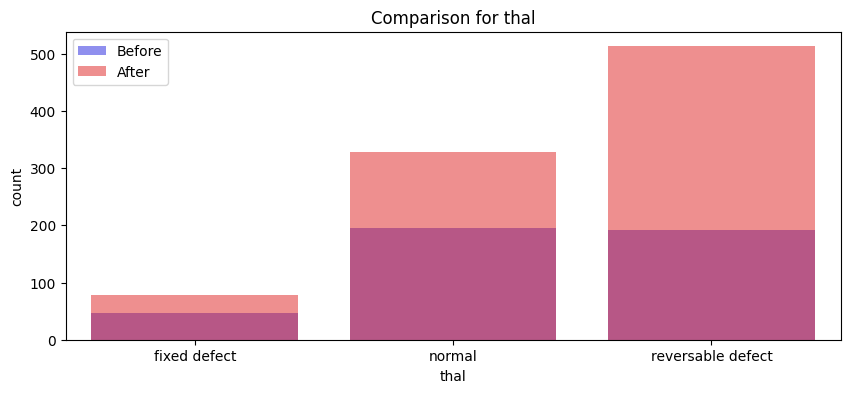

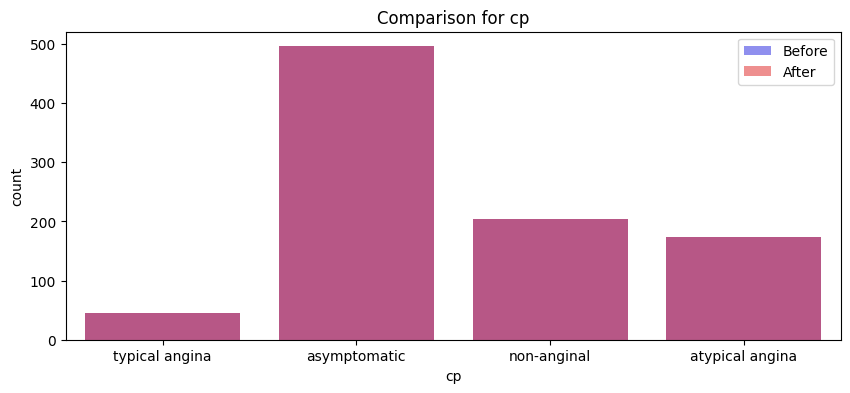

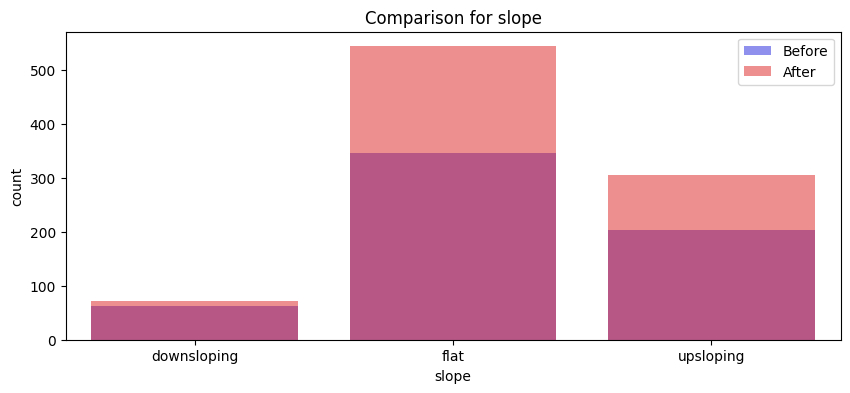

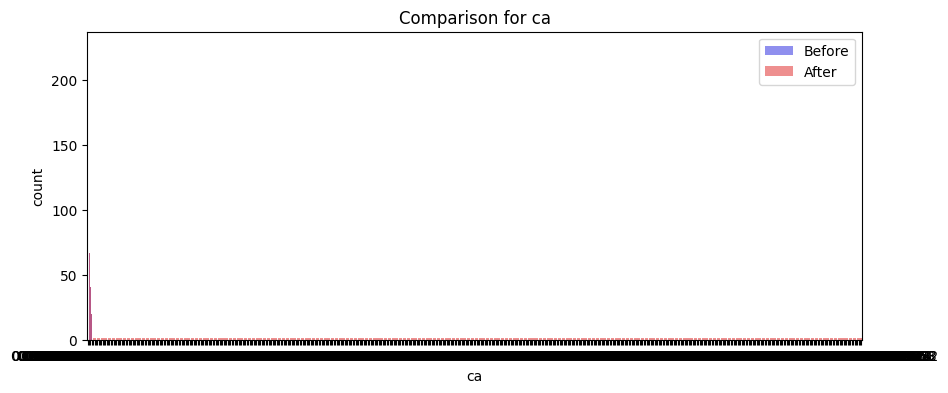

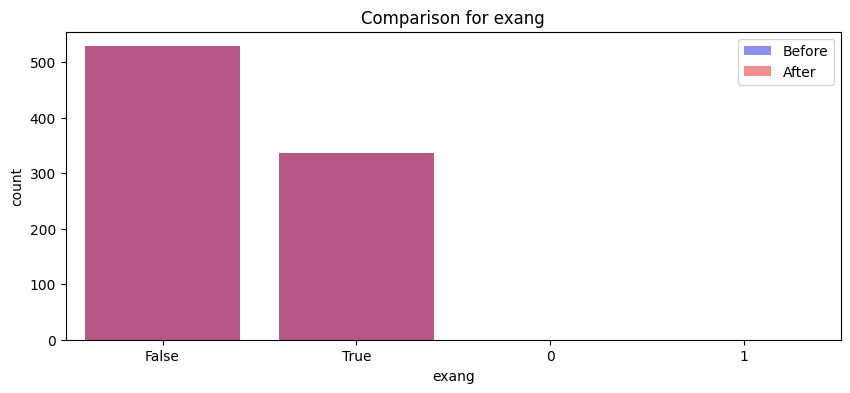

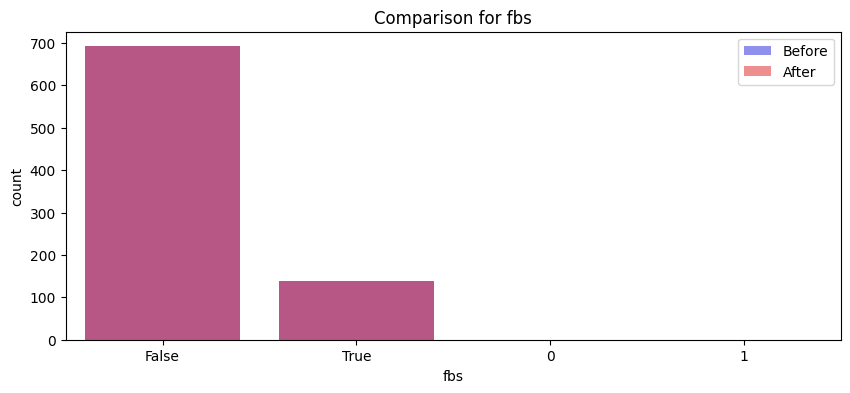

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_cols = ['thal', 'cp', 'slope', 'ca', 'exang', 'fbs']

for col in cat_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(x=col, data=hdb_original, color='blue', alpha=0.5, label='Before')
    sns.countplot(x=col, data=hdb, color='red', alpha=0.5, label='After')
    plt.title(f'Comparison for {col}')
    plt.legend()
    plt.show()


In [18]:
print(hdb_original.mean(numeric_only=True))
print(hdb.mean(numeric_only=True))

id          460.500000
age          53.510870
trestbps    132.132404
chol        199.130337
thalch      137.545665
oldpeak       0.878788
ca            0.676375
num           0.995652
dtype: float64
id          460.500000
age          53.510870
trestbps    132.286807
chol        200.863877
thalch      136.867210
oldpeak       0.913583
ca            0.717716
num           0.995652
dtype: float64


In [19]:
hdb

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1.0,63.0,Male,Cleveland,typical angina,145.000000,233.0,True,lv hypertrophy,150.000000,False,2.300000,downsloping,0.000000,fixed defect,0.0
1,2.0,67.0,Male,Cleveland,asymptomatic,160.000000,286.0,False,lv hypertrophy,108.000000,True,1.500000,flat,3.000000,normal,2.0
2,3.0,67.0,Male,Cleveland,asymptomatic,120.000000,229.0,False,lv hypertrophy,129.000000,True,2.600000,flat,2.000000,reversable defect,1.0
3,4.0,37.0,Male,Cleveland,non-anginal,130.000000,250.0,False,normal,187.000000,False,3.500000,downsloping,0.000000,normal,0.0
4,5.0,41.0,Female,Cleveland,atypical angina,130.000000,204.0,False,lv hypertrophy,172.000000,False,1.400000,upsloping,0.000000,normal,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916.0,54.0,Female,VA Long Beach,asymptomatic,127.000000,333.0,True,st-t abnormality,154.000000,False,0.000000,flat,0.917490,normal,1.0
916,917.0,62.0,Male,VA Long Beach,typical angina,149.515465,139.0,False,st-t abnormality,134.606682,1,1.618566,flat,0.879188,reversable defect,0.0
917,918.0,55.0,Male,VA Long Beach,asymptomatic,122.000000,223.0,True,st-t abnormality,100.000000,False,0.000000,flat,1.061530,fixed defect,2.0
918,919.0,58.0,Male,VA Long Beach,asymptomatic,136.601404,385.0,True,lv hypertrophy,135.009536,1,0.692788,flat,0.742459,reversable defect,0.0


In [28]:
import pandas as pd


In [29]:
hdb = pd.read_csv(r'/content/output_withml_imputations.csv')

In [30]:
hdb

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.000000,233.0,True,lv hypertrophy,150.000000,False,2.300000,downsloping,0.000000,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.000000,286.0,False,lv hypertrophy,108.000000,True,1.500000,flat,3.000000,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.000000,229.0,False,lv hypertrophy,129.000000,True,2.600000,flat,2.000000,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.000000,250.0,False,normal,187.000000,False,3.500000,downsloping,0.000000,normal,0
4,5,41,Female,Cleveland,atypical angina,130.000000,204.0,False,lv hypertrophy,172.000000,False,1.400000,upsloping,0.000000,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.000000,333.0,True,st-t abnormality,154.000000,False,0.000000,flat,0.917490,normal,1
916,917,62,Male,VA Long Beach,typical angina,149.515465,139.0,False,st-t abnormality,134.606683,True,1.618566,flat,0.879188,reversable defect,0
917,918,55,Male,VA Long Beach,asymptomatic,122.000000,223.0,True,st-t abnormality,100.000000,False,0.000000,flat,1.061530,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,136.601404,385.0,True,lv hypertrophy,135.009535,True,0.692788,flat,0.742459,reversable defect,0


In [31]:
hdb.isna().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0


In [32]:
df = hdb.rename(columns = {'dataset': 'location', 'num': 'StagesOfHDrisk', 'thalch': 'maxHeartRate', 'ca': 'coronary arteries', 'chol':'cholestrol levels', 'cp':'type of chest pain', 'fbs':'fasting blood sugar'})
df

,id,age,sex,location,type of chest pain,trestbps,cholestrol levels,fasting blood sugar,restecg,maxHeartRate,exang,oldpeak,slope,coronary arteries,thal,StagesOfHDrisk
0,1,63,Male,Cleveland,typical angina,145.000000,233.0,True,lv hypertrophy,150.000000,False,2.300000,downsloping,0.000000,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.000000,286.0,False,lv hypertrophy,108.000000,True,1.500000,flat,3.000000,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.000000,229.0,False,lv hypertrophy,129.000000,True,2.600000,flat,2.000000,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.000000,250.0,False,normal,187.000000,False,3.500000,downsloping,0.000000,normal,0
4,5,41,Female,Cleveland,atypical angina,130.000000,204.0,False,lv hypertrophy,172.000000,False,1.400000,upsloping,0.000000,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.000000,333.0,True,st-t abnormality,154.000000,False,0.000000,flat,0.917490,normal,1
916,917,62,Male,VA Long Beach,typical angina,149.515465,139.0,False,st-t abnormality,134.606683,True,1.618566,flat,0.879188,reversable defect,0
917,918,55,Male,VA Long Beach,asymptomatic,122.000000,223.0,True,st-t abnormality,100.000000,False,0.000000,flat,1.061530,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,136.601404,385.0,True,lv hypertrophy,135.009535,True,0.692788,flat,0.742459,reversable defect,0


In [33]:
df.isna().sum()

,0
id,0
age,0
sex,0
location,0
type of chest pain,0
trestbps,0
cholestrol levels,0
fasting blood sugar,0
restecg,0
maxHeartRate,0


## **Random Forest Classifier**

In [34]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [35]:
num_cols = ['age', 'trestbps', 'cholestrol levels', 'maxHeartRate', 'oldpeak', 'coronary arteries']
cat_cols = ['type of chest pain', 'restecg', 'slope', 'thal', 'fasting blood sugar', 'sex', 'exang']

In [36]:
x = df[['age', 'trestbps', 'cholestrol levels', 'maxHeartRate', 'oldpeak', 'coronary arteries', 'type of chest pain', 'restecg', 'slope', 'thal', 'fasting blood sugar', 'sex', 'exang']]
y = df['StagesOfHDrisk']

In [37]:
num_trans = Pipeline(steps=[('scaler', StandardScaler())])
cat_trans = Pipeline(steps=[('encoder', OneHotEncoder(drop='first')), ('ordinal', OrdinalEncoder())])

In [38]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


class HeartDiseasePipeline:
    def __init__(self):
        self.num_cols = ['age', 'trestbps', 'cholestrol levels','maxHeartRate', 'oldpeak', 'coronary arteries']
        self.cat_cols = ['type of chest pain', 'restecg', 'slope', 'thal', 'fasting blood sugar', 'sex', 'exang']
        #column transformer pipelines
        self.num_pipeline = Pipeline(steps=[('scaler', StandardScaler())])
        self.cat_pipeline = Pipeline(steps=[('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))])

        # Column transformer
        self.preprocessor = ColumnTransformer(transformers=[
                            ('num', self.num_pipeline, self.num_cols),
                            ('cat', self.cat_pipeline, self.cat_cols)])

        # Random Forest model pipeline
        self.model = Pipeline(steps=[
                     ('preprocessor', self.preprocessor),
                     ('classifier', RandomForestClassifier( n_estimators=200, max_depth=None, random_state=42))
        ])

    def split_data(self, df, target='StagesOfHDrisk', test_size=0.2, random_state=42):
        X = df[self.num_cols + self.cat_cols]
        y = df[target]

        return train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)
        #stratify is used to balance the data to preserve the class proportions of data

    def train(self, X_train, y_train):
        self.model.fit(X_train, y_train)

    def predict(self, X_test):
        return self.model.predict(X_test)

    def score(self, X_test, y_test):
        return self.model.score(X_test, y_test)

In [39]:
pipeline = HeartDiseasePipeline()
X_train, X_test, y_train, y_test = pipeline.split_data(df, target='StagesOfHDrisk')
pipeline.train(X_train, y_train)
print('Accuracy:', pipeline.score(X_test, y_test))

Accuracy: 0.6195652173913043


In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
y_pred = pipeline.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

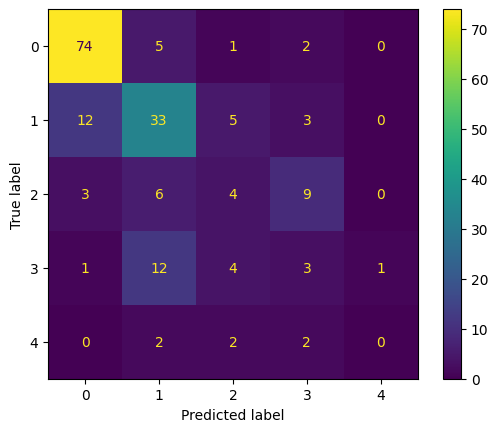

In [41]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [42]:
import pandas as pd
import numpy as np

# Get trained random forest model
rf = pipeline.model.named_steps['classifier']

# Get feature names after preprocessing
feature_names = pipeline.model.named_steps['preprocessor'].get_feature_names_out()

# Get importances
importances = rf.feature_importances_

# Create dataframe
feat_imp = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

feat_imp.head(10)

,feature,importance
5,num__coronary arteries,0.154417
3,num__maxHeartRate,0.115504
0,num__age,0.110010
2,num__cholestrol levels,0.109348
4,num__oldpeak,0.101296
1,num__trestbps,0.092179
13,cat__thal_normal,0.057481
17,cat__exang_True,0.046051
14,cat__thal_reversable defect,0.032124
6,cat__type of chest pain_atypical angina,0.030009


In [43]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    pipeline.model,
    X_test,
    y_test,
    n_repeats=10,
    random_state=42,
    scoring='accuracy'
)

perm_imp = pd.DataFrame({
    'feature': X_test.columns, # Corrected: Use original X_test columns
    'importance': result.importances_mean
}).sort_values(by='importance', ascending=False)

perm_imp.head(10)

,feature,importance
9,thal,0.066304
5,coronary arteries,0.026087
4,oldpeak,0.023913
6,type of chest pain,0.017391
8,slope,0.011957
12,exang,0.008152
11,sex,-0.001087
1,trestbps,-0.001087
10,fasting blood sugar,-0.002717
3,maxHeartRate,-0.004348


In [44]:
!pip install shap

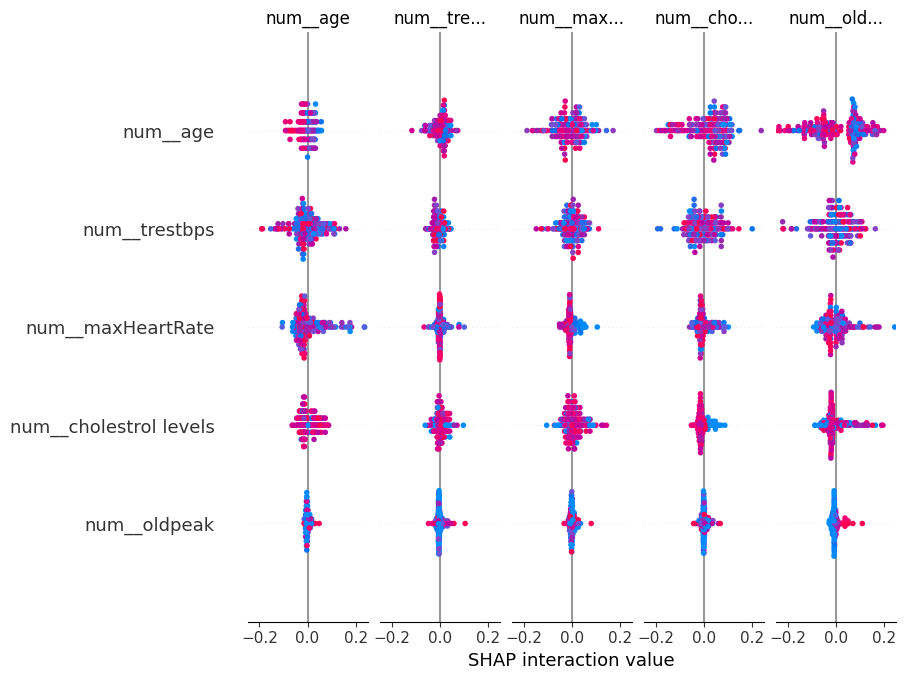

In [46]:
import shap

# Transform data
X_test_transformed = pipeline.model.named_steps['preprocessor'].transform(X_test)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test_transformed)
shap.summary_plot(shap_values, X_test_transformed, feature_names=feature_names)

In [47]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500,# more trees → better stability
    max_depth=10,              # prevents noisy splits
    min_samples_split=10,      # reduces overfitting
    min_samples_leaf=5,        # forces generalization
    class_weight='balanced',   # key fix for class 4
    random_state=42,
    n_jobs=-1)



In [48]:
pipeline.model.set_params(classifier=rf)

pipeline.train(X_train, y_train)

print("Accuracy:", pipeline.score(X_test, y_test))


Accuracy: 0.6141304347826086


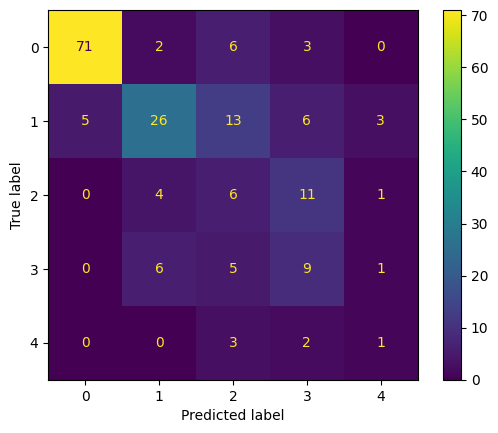

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = pipeline.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()


In [50]:
print(cm)

[[71  2  6  3  0]
 [ 5 26 13  6  3]
 [ 0  4  6 11  1]
 [ 0  6  5  9  1]
 [ 0  0  3  2  1]]


In [51]:
# actual count of each class
df['StagesOfHDrisk'].value_counts().sort_index()

,count
StagesOfHDrisk,
0,411
1,265
2,109
3,107
4,28


## 02/02/2026

In [13]:
import pandas as pd

hdb = pd.read_csv(r'/content/output_withml_imputations.csv')

In [14]:
hdb.isna().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0


In [15]:
df = hdb.rename(columns = {'dataset': 'location', 'num': 'StagesOfHDrisk', 'thalch': 'maxHeartRate', 'ca': 'coronary arteries', 'chol':'cholestrol levels', 'cp':'type of chest pain', 'fbs':'fasting blood sugar'})
df

,id,age,sex,location,type of chest pain,trestbps,cholestrol levels,fasting blood sugar,restecg,maxHeartRate,exang,oldpeak,slope,coronary arteries,thal,StagesOfHDrisk
0,1,63,Male,Cleveland,typical angina,145.000000,233.0,True,lv hypertrophy,150.000000,False,2.300000,downsloping,0.000000,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.000000,286.0,False,lv hypertrophy,108.000000,True,1.500000,flat,3.000000,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.000000,229.0,False,lv hypertrophy,129.000000,True,2.600000,flat,2.000000,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.000000,250.0,False,normal,187.000000,False,3.500000,downsloping,0.000000,normal,0
4,5,41,Female,Cleveland,atypical angina,130.000000,204.0,False,lv hypertrophy,172.000000,False,1.400000,upsloping,0.000000,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.000000,333.0,True,st-t abnormality,154.000000,False,0.000000,flat,0.917490,normal,1
916,917,62,Male,VA Long Beach,typical angina,149.515465,139.0,False,st-t abnormality,134.606683,True,1.618566,flat,0.879188,reversable defect,0
917,918,55,Male,VA Long Beach,asymptomatic,122.000000,223.0,True,st-t abnormality,100.000000,False,0.000000,flat,1.061530,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,136.601404,385.0,True,lv hypertrophy,135.009535,True,0.692788,flat,0.742459,reversable defect,0


In [16]:
df.isna().sum()

,0
id,0
age,0
sex,0
location,0
type of chest pain,0
trestbps,0
cholestrol levels,0
fasting blood sugar,0
restecg,0
maxHeartRate,0


# XG Boost Model
- XGBoost Model for Heart Disease Classification
Complete implementation with hyperparameter tuning

### **Step 1: Split the data**

In [18]:
import numpy as np

In [19]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight


X = df.drop(["StagesOfHDrisk", "id", "location"], axis=1)
y = df["StagesOfHDrisk"]


X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)


X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp) #test and val = 50% of 30 which is 15 equally divided

classes = np.unique(y_train)
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=classes,
    y=y_train)


### **Step 2: Column Transformer**

In [20]:
num_cols = ['age', 'trestbps', 'cholestrol levels', 'maxHeartRate', 'oldpeak', 'coronary arteries']
cat_cols = ['type of chest pain', 'restecg', 'slope', 'thal', 'fasting blood sugar', 'sex', 'exang']

In [21]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline(steps=[('scaler', StandardScaler())])
cat_pipeline = Pipeline(steps=[('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))])

In [22]:
preprocessor = ColumnTransformer(transformers=[('num', num_pipeline, num_cols), ('cat', cat_pipeline, cat_cols)])

In [23]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_val_transformed = preprocessor.transform(X_val)
X_test_transformed = preprocessor.transform(X_test)

In [24]:
class_weight_dict = dict(zip(classes, class_weights))
print(class_weight_dict)

{np.int64(0): np.float64(0.44722222222222224), np.int64(1): np.float64(0.6962162162162162), np.int64(2): np.float64(1.694736842105263), np.int64(3): np.float64(1.7173333333333334), np.int64(4): np.float64(6.44)}


In [25]:
#model building on xgb
sample_weights = y_train.map(class_weight_dict)

In [26]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42)


In [27]:
!pip install xgboost
!pip install optuna

In [28]:
import optuna
from sklearn.metrics import f1_score
from xgboost import XGBClassifier

def objective(trial):

    params = {
        "objective": "multi:softprob",
        "num_class": len(classes),
        "eval_metric": "mlogloss",
        "random_state": 42,

        #  hyperparameters to tune
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "n_estimators": trial.suggest_int("n_estimators", 100, 600),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "gamma": trial.suggest_float("gamma", 0, 5),
    }

    f1_scores = []

    for train_idx, val_idx in cv.split(X_train_transformed, y_train):

        X_tr, X_val = (
            X_train_transformed[train_idx],
            X_train_transformed[val_idx]
        )
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        # sample weights per fold
        sw_tr = sample_weights.iloc[train_idx]

        model = XGBClassifier(**params)

        model.fit(
            X_tr,
            y_tr,
            sample_weight=sw_tr
        )

        y_pred = model.predict(X_val)

        f1 = f1_score(y_val, y_pred, average="macro")
        f1_scores.append(f1)

    return np.mean(f1_scores)

In [29]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

[I 2026-02-02 11:51:33,332] A new study created in memory with name: no-name-2f843f85-1907-4539-be62-8a6f77ab4a54
[I 2026-02-02 11:51:45,674] Trial 0 finished with value: 0.44507575994115467 and parameters: {'learning_rate': 0.02154509233195203, 'max_depth': 5, 'n_estimators': 422, 'subsample': 0.7342590390875248, 'colsample_bytree': 0.6260151119413144, 'min_child_weight': 7, 'gamma': 2.572623057565643}. Best is trial 0 with value: 0.44507575994115467.
[I 2026-02-02 11:52:00,955] Trial 1 finished with value: 0.44516374773747935 and parameters: {'learning_rate': 0.025895844745263262, 'max_depth': 4, 'n_estimators': 562, 'subsample': 0.6502037019792813, 'colsample_bytree': 0.771342210474349, 'min_child_weight': 2, 'gamma': 4.821974108504295}. Best is trial 1 with value: 0.44516374773747935.
[I 2026-02-02 11:52:02,086] Trial 2 finished with value: 0.42215017404870975 and parameters: {'learning_rate': 0.013616496840250444, 'max_depth': 6, 'n_estimators': 101, 'subsample': 0.978645430076116

In [30]:
print("Best score:", study.best_value)
print("Best params:", study.best_params)

Best score: 0.44681140001575337
Best params: {'learning_rate': 0.02080863870581149, 'max_depth': 5, 'n_estimators': 443, 'subsample': 0.7441320710646017, 'colsample_bytree': 0.6353343931126824, 'min_child_weight': 7, 'gamma': 4.3130386960991265}


In [31]:
best_model = XGBClassifier(
    **study.best_params,
    objective="multi:softprob",
    num_class=len(classes),
    eval_metric="mlogloss",
    random_state=42)

best_model.fit(
    X_train_transformed,
    y_train,
    sample_weight=sample_weights)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6353343931126824, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None, feature_weights=None,
              gamma=4.3130386960991265, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02080863870581149,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=443, n_jobs=None, num_class=5, ...)

In [32]:
X_val_transformed = preprocessor.transform(X_val)
y_val_pred = best_model.predict(X_val_transformed)

from sklearn.metrics import classification_report
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.98      0.75      0.85        61
           1       0.66      0.47      0.55        40
           2       0.15      0.18      0.16        17
           3       0.28      0.50      0.36        16
           4       0.08      0.25      0.12         4

    accuracy                           0.56       138
   macro avg       0.43      0.43      0.41       138
weighted avg       0.68      0.56      0.60       138



In [33]:
X_test_transformed = preprocessor.transform(X_test)
y_test_pred = best_model.predict(X_test_transformed)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.81      0.85        62
           1       0.70      0.35      0.47        40
           2       0.22      0.44      0.29        16
           3       0.23      0.31      0.26        16
           4       0.00      0.00      0.00         4

    accuracy                           0.55       138
   macro avg       0.41      0.38      0.38       138
weighted avg       0.66      0.55      0.58       138



### XIA Predictions:
- Features
- Permutations
- Shap

In [35]:
import pandas as pd
import numpy as np

# Get trained xgboost model
xgb = best_model

# Get feature names after preprocessing
feature_names = preprocessor.get_feature_names_out()

# Get importances
importances = xgb.feature_importances_

# Create dataframe
feat_imp = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

feat_imp.head(10)

,feature,importance
13,cat__thal_normal,0.104616
6,cat__type of chest pain_atypical angina,0.071713
4,num__oldpeak,0.066248
5,num__coronary arteries,0.065585
11,cat__slope_flat,0.063319
12,cat__slope_upsloping,0.063310
17,cat__exang_True,0.060977
9,cat__restecg_normal,0.055055
1,num__trestbps,0.054363
3,num__maxHeartRate,0.051959


In [38]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    best_model,
    X_test_transformed,
    y_test,
    n_repeats=10,
    random_state=42,
    scoring='accuracy'
)

perm_imp = pd.DataFrame({
    'feature': feature_names, # Corrected: Use feature_names which are from the transformed data
    'importance': result.importances_mean
}).sort_values(by='importance', ascending=False)

perm_imp.head(10)

,feature,importance
5,num__coronary arteries,0.073188
13,cat__thal_normal,0.042754
6,cat__type of chest pain_atypical angina,0.021739
1,num__trestbps,0.020290
11,cat__slope_flat,0.020290
2,num__cholestrol levels,0.017391
4,num__oldpeak,0.012319
3,num__maxHeartRate,0.010870
9,cat__restecg_normal,0.008696
12,cat__slope_upsloping,0.006522


In [39]:
!pip install shap

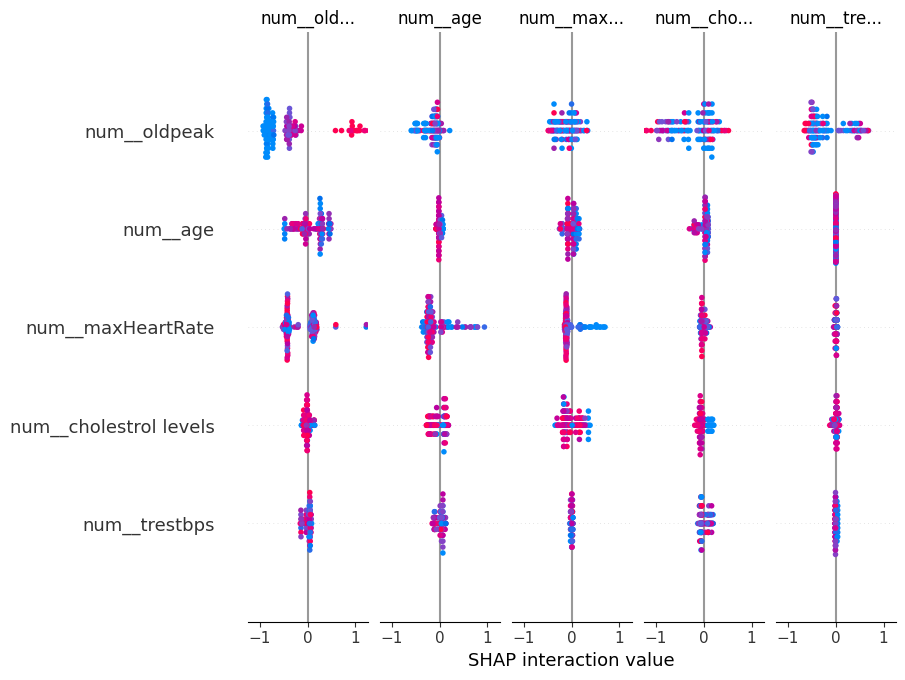

In [41]:
import shap

# X_test_transformed is already available from the XGBoost setup

explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test_transformed)
shap.summary_plot(shap_values, X_test_transformed, feature_names=feature_names)